<a href="https://colab.research.google.com/github/jimilee/covid_da/blob/main/Covid19_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret
!pip install pycaret-ts-alpha
import pandas as pd
import numpy as np
from pycaret.datasets import get_data

     |████████████████████████████████| 301 kB 18.7 MB/s 
     |████████████████████████████████| 15.6 MB 72.4 MB/s 
     |████████████████████████████████| 1.3 MB 72.3 MB/s 
     |████████████████████████████████| 1.7 MB 73.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 57.5 MB/s 
     |████████████████████████████████| 167 kB 76.7 MB/s 
     |████████████████████████████████| 2.0 MB 59.9 MB/s 
     |████████████████████████████████| 261 kB 77.7 MB/s 
     |████████████████████████████████| 114 kB 80.5 MB/s 
     |████████████████████████████████| 86 kB 8.5 MB/s 
     |████████████████████████████████| 56 kB 6.6 MB/s 
     |████████████████████████████████| 303 kB 74.9 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 102 kB 17.6 MB/s 
     |██████████████████

In [3]:

# Convert dataframe for pycaret.
covid_data_origin = pd.read_excel('/content/drive/MyDrive/코로나바이러스감염증-19_확진환자_발생현황_220111.xlsx', skiprows=range(4))
covid_data_origin = covid_data_origin.drop(0)
covid_data_origin.columns=['Date','Total','Domestic','Inflow','Death']
idx = pd.to_datetime(covid_data_origin['Date'])

total_list = covid_data_origin['Total'].replace(['-'],'0').astype(np.float64).tolist()
covid_data = pd.Series(total_list, idx)
covid_data.head()

Date
2020-01-20    1.0
2020-01-21    0.0
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    1.0
dtype: float64

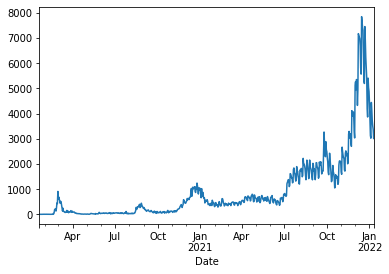

In [4]:
# plot the data
covid_data.plot()

In [27]:
# with functional API
from pycaret.time_series import *
setup(covid_data, fh = 10, fold = 5, session_id = 123)
# with new object-oriented API
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()
exp.setup(covid_data, fh = 50, fold = 5, session_id = 123, use_gpu= True)

,Description,Value
0,session_id,123
1,Original Data,"(723, 1)"
2,Missing Values,False
3,Transformed Train Set,"(673,)"
4,Transformed Test Set,"(50,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,5
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [28]:
check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,723
1,Summary,Statistics,Mean,,927.362
2,Summary,Statistics,Median,,450
3,Summary,Statistics,Standard Deviation,,1369.2
4,Summary,Statistics,Variance,,1.87471e+06
5,Summary,Statistics,Kurtosis,,7.63457
6,Summary,Statistics,Skewness,,2.62243
7,Summary,Statistics,# Distinct Values,,528
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",12534.8
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",16864


In [29]:
# functional API
plot_model(plot = 'ts')
# object-oriented API
exp.plot_model(plot = 'ts')

In [30]:
# cross-validation plot
plot_model(plot = 'cv')

In [31]:
# ACF plot
plot_model(plot = 'acf')

In [32]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

In [33]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

In [ ]:
# functional API
best = compare_models()
# object-oriented API
best = exp.compare_models()

IntProgress(value=0, description='Processing: ', max=139)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:49:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
arima,ARIMA,883.861,1027.21,0.1821,0.1835,6.3795,-0.6533,0.066
naive,Naive Forecaster,1176.46,1327.47,0.2448,0.2394,8.4145,-1.8835,0.812
snaive,Seasonal Naive Forecaster,1158.16,1279.3,0.24,0.2566,8.4961,-1.5468,0.014
polytrend,Polynomial Trend Forecaster,3006.75,3124.58,0.5779,0.8336,21.7188,-12.322,0.012
grand_means,Grand Means Forecaster,4199.36,4283.03,0.8438,1.4656,30.4359,-24.6528,0.012


In [14]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-12-14,2924.2302,3086.9509,0.4223,0.5431,18.8589,-7.9243
1,2021-12-21,1490.8334,1803.5003,0.2340,0.2759,9.4241,-1.1585
2,2021-12-28,779.7864,971.6419,0.2219,0.1877,4.6798,-0.2428
Mean,NaT,1731.6166,1954.0310,0.2927,0.3356,10.9876,-3.1086
SD,NaT,891.8678,870.1064,0.0917,0.1511,5.8932,3.4257


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [15]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-12-14,2854.4796,2933.2529,0.4198,0.5329,18.4091,-7.0578
1,2021-12-21,1239.8580,1469.0606,0.1965,0.2245,7.8376,-0.4322
2,2021-12-28,674.4468,750.1755,0.1816,0.1616,4.0476,0.2592
Mean,NaT,1589.5948,1717.4964,0.2660,0.3063,10.0981,-2.4103
SD,NaT,923.7144,908.3857,0.1090,0.1622,6.0770,3.2984


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.08729012506251736,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.29741084458985756,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=8.755734725056497,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [16]:
plot_model(best, plot = 'forecast')

In [17]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})